Notebook to explore python visualisation libraries

### Setup

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd

In [3]:
import warnings, logging

In [4]:
warnings.simplefilter("ignore")

In [5]:
logging.getLogger('matplotlib.font_manager').disabled = True

In [6]:
# Getting example dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [7]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [8]:
X.columns.to_list()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Yellowbrick

- Docs: https://www.scikit-yb.org/en/latest/index.html

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

In [12]:
feature_cols = [
    'MedInc',
     'HouseAge',
     'AveRooms',
     'AveBedrms',
     'Population',
     'AveOccup',
]    

In [13]:
pipeline.fit(X_train[feature_cols], y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [14]:
r2_score(y_test, pipeline.predict(X_test[feature_cols]))

0.5119755667840205

#### Residual plot

In [15]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

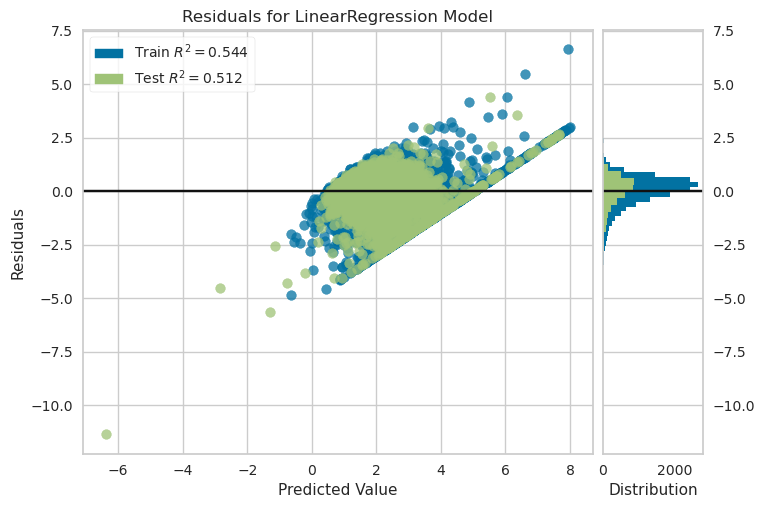

In [16]:
visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train[feature_cols], y_train)
visualizer.score(X_test[feature_cols], y_test)
visualizer.show();

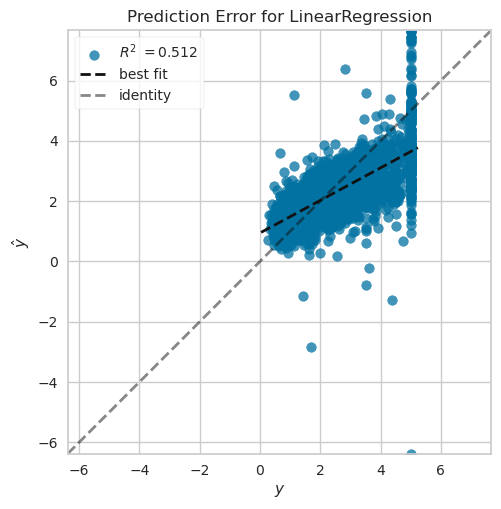

In [17]:
visualizer = PredictionError(pipeline)

visualizer.fit(X_train[feature_cols], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[feature_cols], y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

Editing plots with MPL object-orientated interface

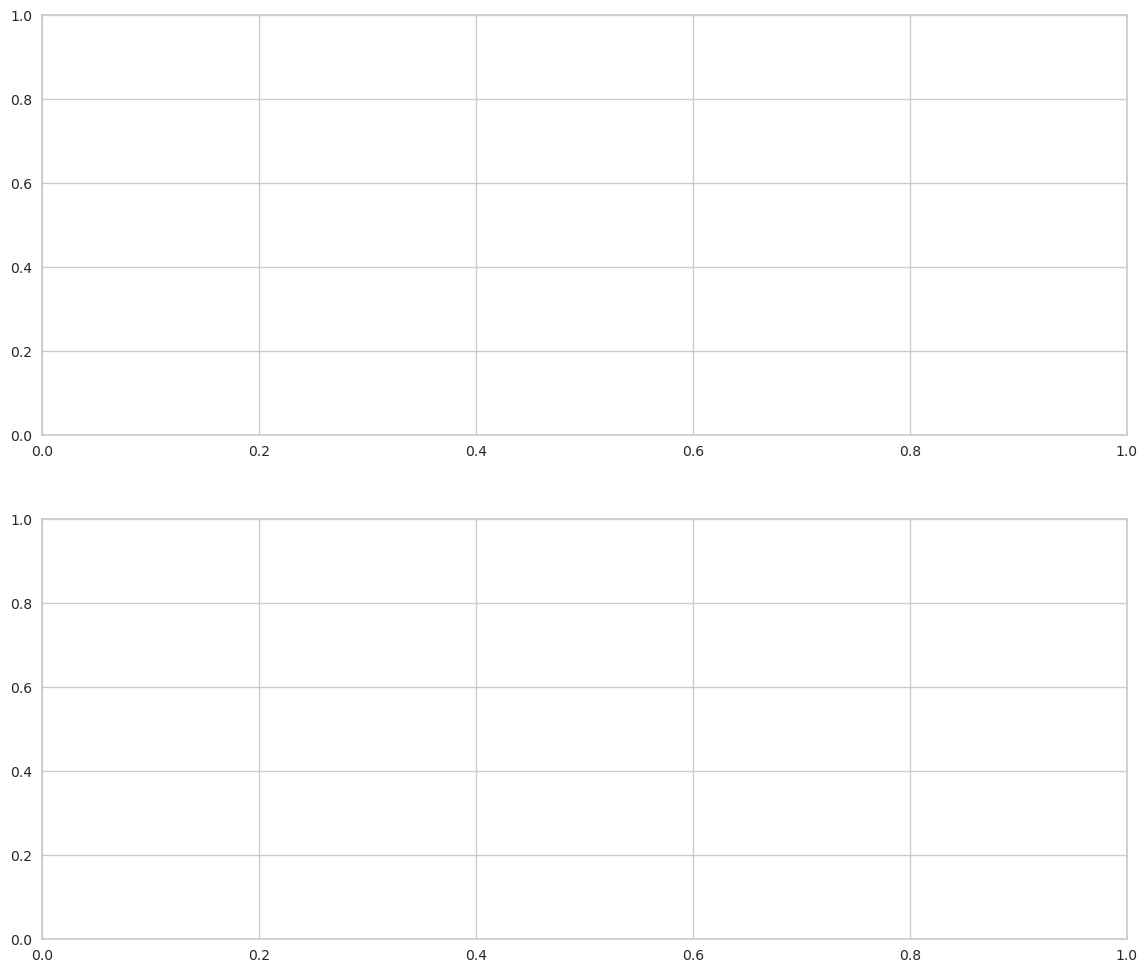

In [18]:
fig, axs = plt.subplots(2, 1, figsize = (14, 12));

In [19]:
from yellowbrick.regressor.prediction_error import prediction_error
from yellowbrick.regressor import residuals_plot

In [20]:
# quick draw method
visualiser_errors = prediction_error(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    show=False,
    shared_limits=False,
    ax=axs[0],
)

In [21]:
# quick draw method
visualiser_residuals = residuals_plot(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    hist=False,
    qqplot=True,
    show=False,
    ax=axs[1],
)

In [22]:
visualiser_errors.ax.set_xlim([0, 6])
visualiser_errors.ax.set_ylim([0, 8])
visualiser_errors.ax.legend(loc=2)

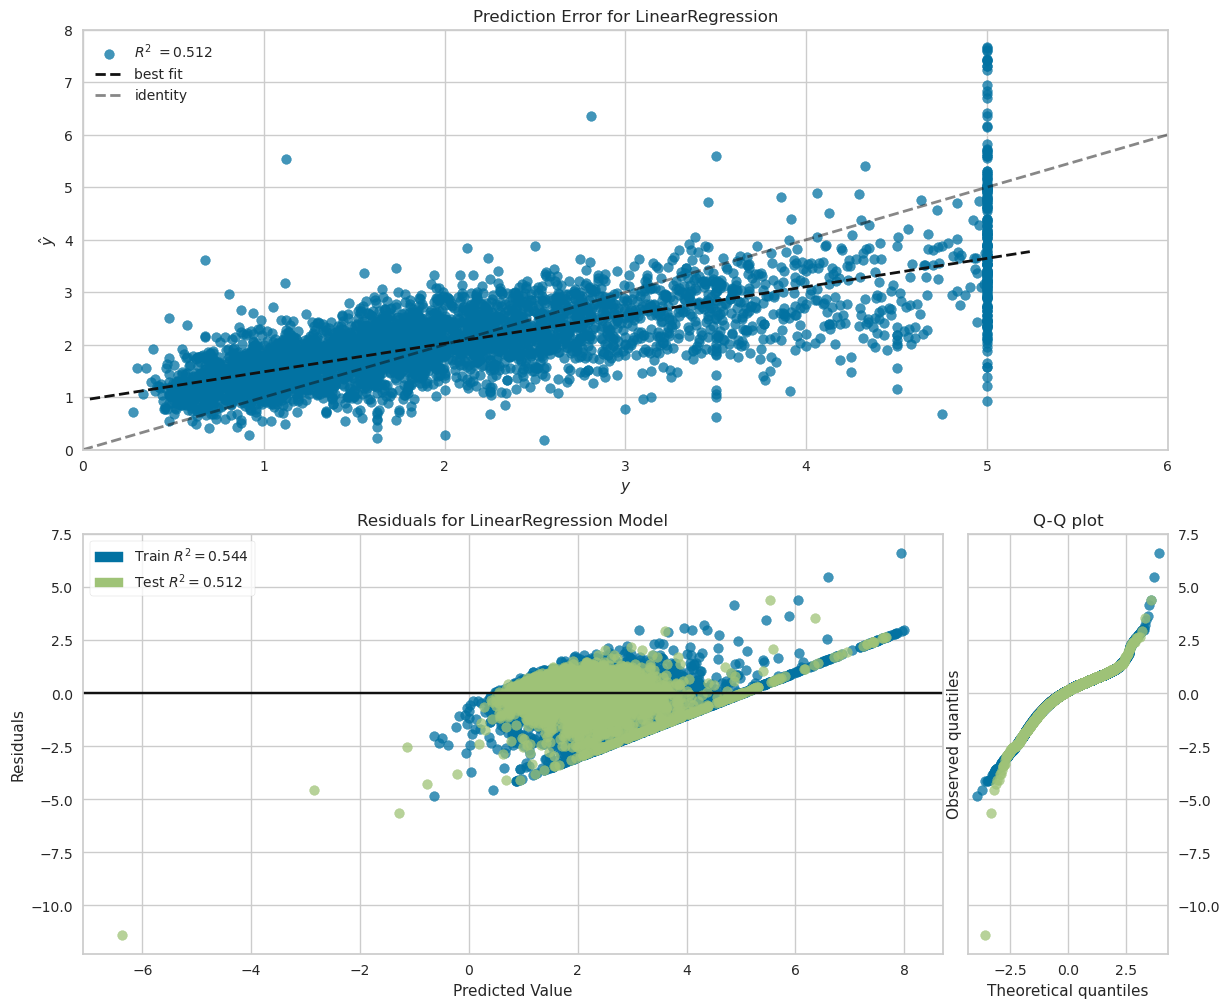

In [23]:
fig

## mlxtend

- Docs: https://rasbt.github.io/mlxtend/

Package isn't completely compatible with recent sklearn changes like the use of pandas dataframes.

In [10]:
import pandas as pd

In [11]:
penguin_filepath = "../data/penguins_size.csv"

In [12]:
df_penguins = pd.read_csv(penguin_filepath)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [119]:
from mlxtend.plotting import plot_decision_regions

In [120]:
import numpy as np

In [171]:
from sklearn.metrics import accuracy_score

In [109]:
penguin_feature_cols = [
    'culmen_length_mm', 'culmen_depth_mm',
       # 'flipper_length_mm', 'body_mass_g',
]

In [142]:
X = df_penguins[penguin_feature_cols]
y = df_penguins['species'].map(label_mapping)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
simple_inputer = SimpleImputer()
X_train = simple_inputer.fit_transform(X_train)
X_test = simple_inputer.transform(X_test)

In [155]:
lr_model = LogisticRegression().fit(X_train, y_train)
svc_model = SVC().fit(X_train, y_train)
adab_model = AdaBoostClassifier().fit(X_train, y_train)

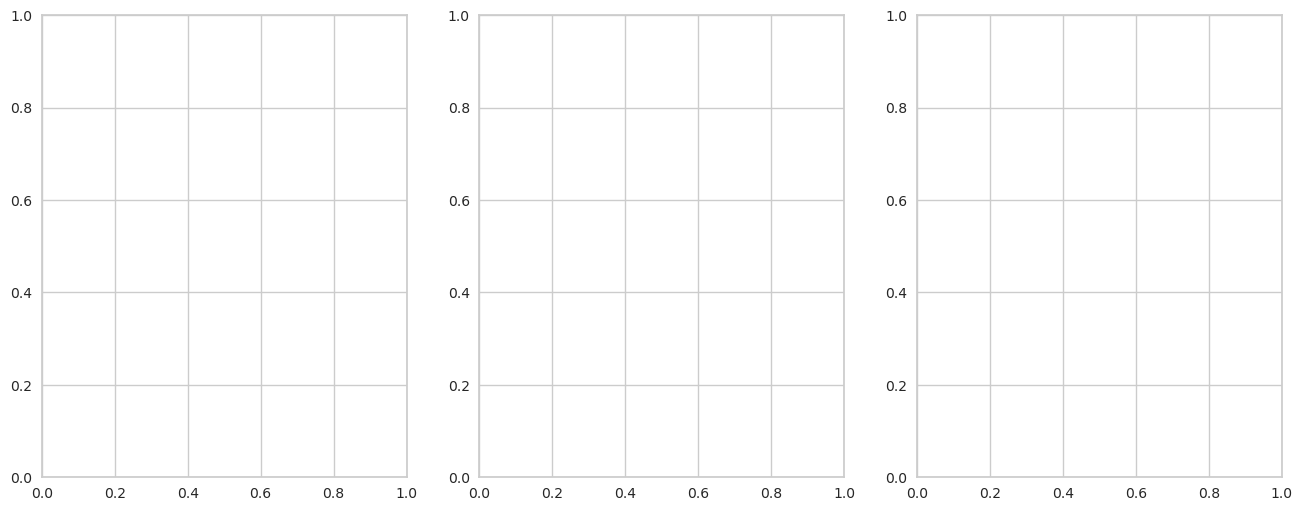

In [170]:
# plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

In [174]:
clf_names = ["Logistic regression", "SVC", "AdaBoost"]
clfs = [lr_model, svc_model, adab_model]

xlabel, ylabel = penguin_feature_cols
for clf, clf_name, ax in zip(clfs, clf_names, axs):
    plot_decision_regions(
        X_test,
        y_test.to_numpy(),
        clf=clf,
        ax=ax
    )
    
    acc = accuracy_score(y_test, clf.predict(X_test))
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"clf_name: accuracy: {100.0 * acc:.2f}%")

<Figure size 800x550 with 0 Axes>

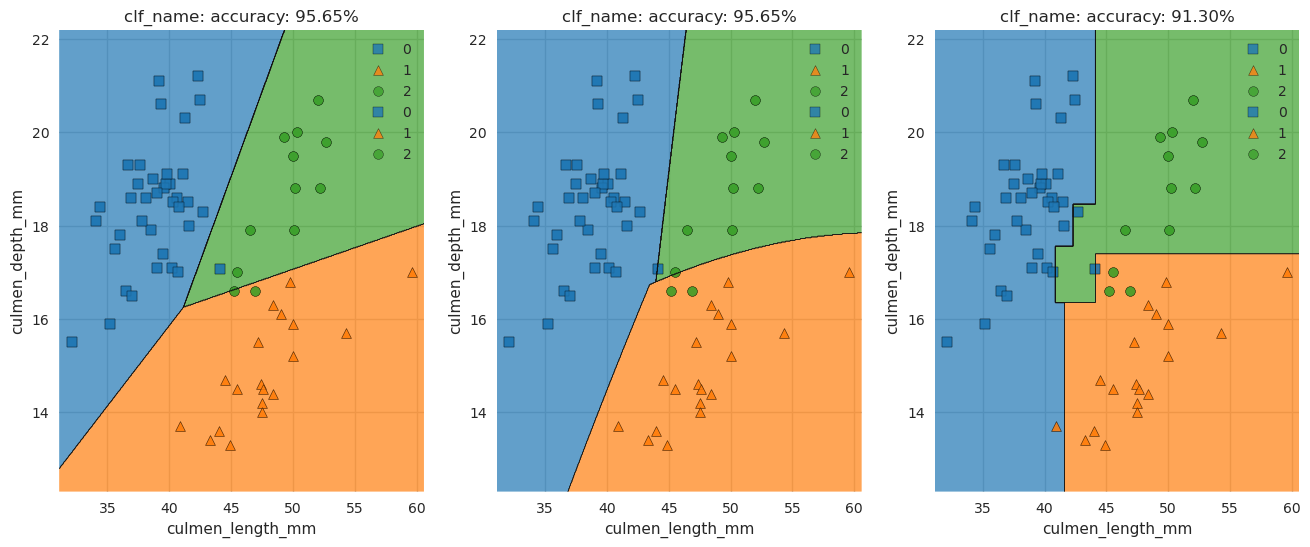

In [175]:
fig

## mplfinance

Docs: 
- https://github.com/matplotlib/mplfinance/t 
- https://pypi.org/project/mplfinance/

In [48]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [80]:
df_AAPL = pd.read_csv("../data/AAPL.csv.zip")

In [81]:
df_AAPL.set_index("Date", inplace=True)

In [82]:
df_AAPL.index = pd.to_datetime(df_AAPL.index)

In [83]:
df_AAPL = df_AAPL[(df_AAPL.index > '2004-02-01') & (df_AAPL.index < '2004-05-01')]

In [63]:
mpf_styles = [
    'yahoo',
    'mike',
    'binance',
]

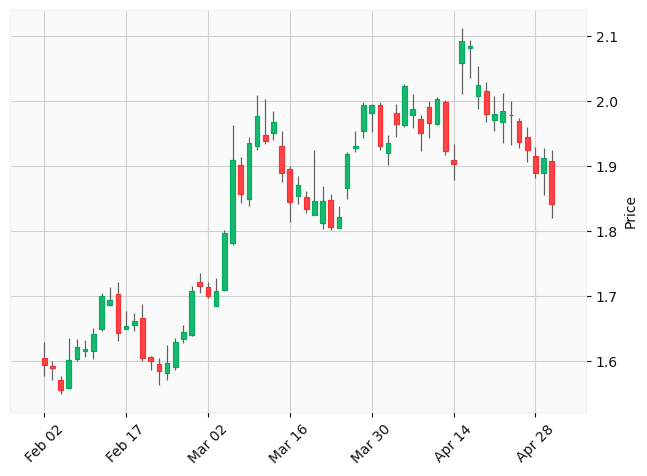

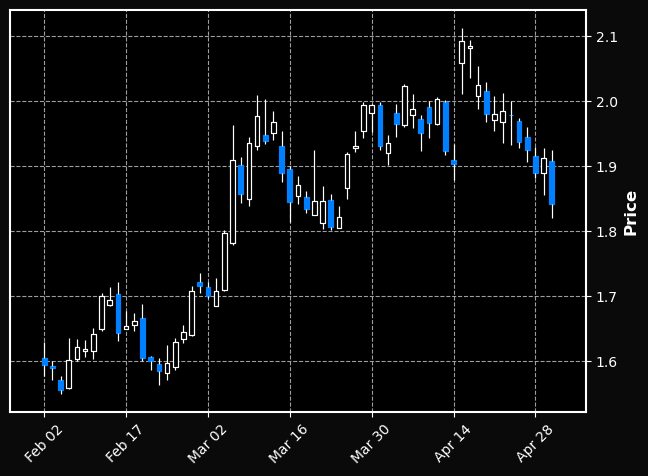

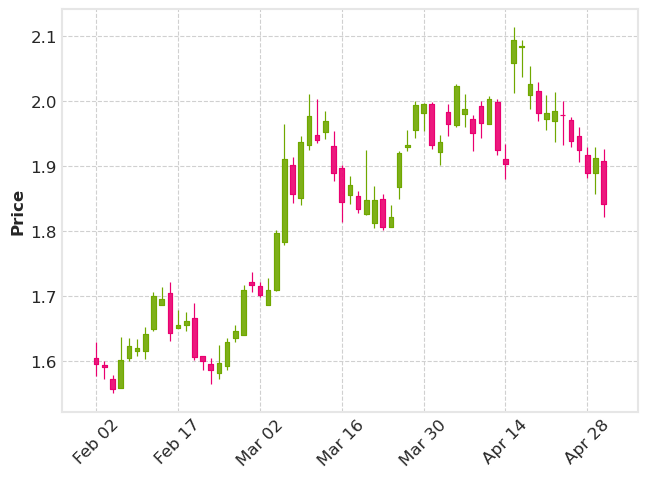

In [66]:
for mpf_style in mpf_styles:
    mpf.plot(df_AAPL, type='candle', style=mpf_style)

In [67]:
# showing make_addplot functionality

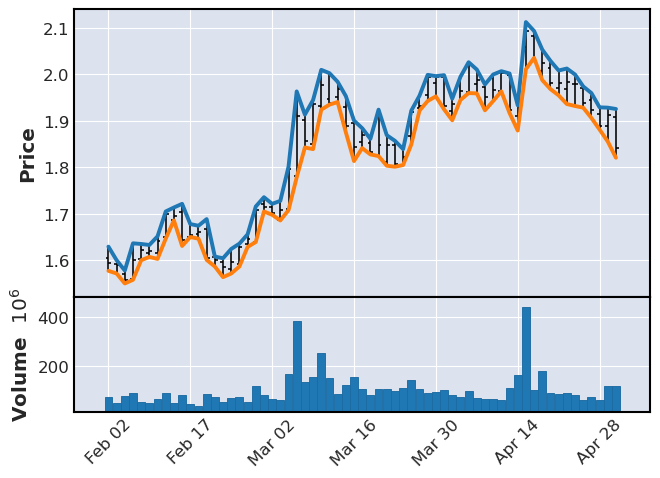

In [69]:
add_plots = mpf.make_addplot(df_AAPL[["High", "Low"]])
mpf.plot(df_AAPL, addplot=add_plots, volume=True)

In [70]:
df_AAPL["range"] = df_AAPL["High"] - df_AAPL["Low"]

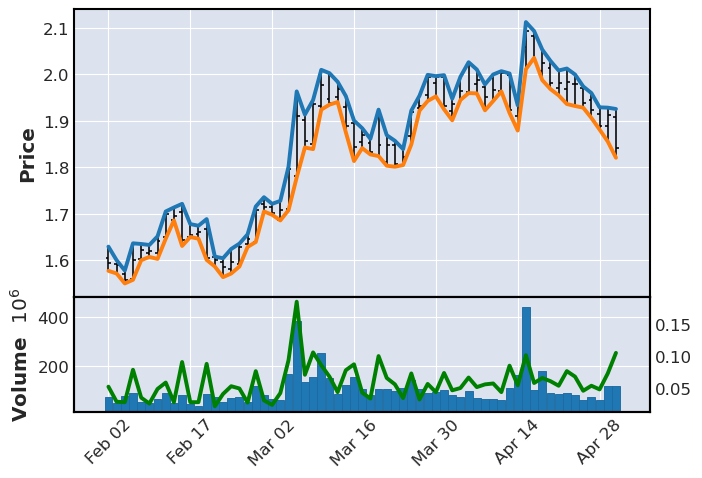

In [73]:
add_plots = [
    mpf.make_addplot(df_AAPL[["High", "Low"]]),
    mpf.make_addplot(df_AAPL["range"], panel=1, color='g'),
]
mpf.plot(df_AAPL, addplot=add_plots, volume=True)

Notes:
- Makes alright plots
- API a bit strange
- Difficult to get access to underlying objects
- Good range of styles
- Has potential

## mpld3

In [1]:
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [6]:
from mpld3 import plugins

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid(True, alpha=0.3)

for species in df_penguins["species"].unique():
    l, = ax.plot(
        df_penguins[df_penguins["species"] == species]["culmen_depth_mm"].values,
        df_penguins[df_penguins["species"] == species]["culmen_length_mm"].values,
        label=species,
        marker='.',
        markersize=20,
        linestyle='None',
    )

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(ax.lines,
                                                     labels,
                                                     alpha_unsel=0.1,
                                                     alpha_over=1.5, 
                                                     start_visible=True)

    
plugins.connect(fig, interactive_legend)

ax.set_xlabel('Culmen depth [mm]')
ax.set_ylabel('Culmen length [mm]')
ax.set_title('Culmen length vs depth', size=20)

mpld3.display(fig)

Need to add more stocks to this

In [92]:
# plot line + confidence interval
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, alpha=0.3)

l, = ax.plot(df_AAPL.index, df_AAPL["Close"].values, label='AAPL')
ax.fill_between(df_AAPL.index,
    df_AAPL["Low"],
                df_AAPL["High"],
                color=l.get_color(), alpha=.4)


# for key, val in df.items():
#     l, = ax.plot(val.index, val.values, label=key)
#     ax.fill_between(val.index,
#                     val.values * .5, val.values * 1.5,
#                     color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

# ax.set_xlabel('Date')
# ax.set_ylabel('y')
ax.set_title('AAPL stock', size=20)

mpld3.display(fig)

In [94]:
mpld3.save_html(fig, "fig.html")

## great_tables

In [59]:
from great_tables import GT
from great_tables import html, md

In [11]:
NY_housing_path = "../data/NY-House-Dataset.csv"

In [12]:
df_NY = pd.read_csv(NY_housing_path)

In [15]:
df_NY.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [23]:
for cat_col in df_NY.select_dtypes(include=['object']).columns:
    display(100.0 * df_NY[cat_col].value_counts(normalize=True)[:5])

BROKERTITLE
Brokered by COMPASS                              9.498021
Brokered by Douglas Elliman - 575 Madison Ave    2.291189
Brokered by Brown Harris Stevens                 1.937096
Brokered by Corcoran East Side                   1.895438
Brokered by RE MAX Edge                          1.645491
Name: proportion, dtype: float64

TYPE
Co-op for sale                30.202041
House for sale                21.078942
Condo for sale                18.558634
Multi-family home for sale    15.142679
Townhouse for sale             6.227869
Name: proportion, dtype: float64

ADDRESS
2619 Shore Pkwy              0.062487
856 Washington Ave Apt 6C    0.062487
595 Van Buren St             0.041658
2217 Gunther Ave             0.041658
18 E 63rd St Apt 9           0.041658
Name: proportion, dtype: float64

STATE
Brooklyn, NY 11235         2.124557
Brooklyn, NY 11209         1.957925
Forest Hills, NY 11375     1.895438
Brooklyn, NY 11234         1.874609
Staten Island, NY 10314    1.791293
Name: proportion, dtype: float64

MAIN_ADDRESS
2619 Shore PkwyBrooklyn, NY 11223              0.062487
856 Washington Ave Apt 6CBrooklyn, NY 11238    0.062487
595 Van Buren StBrooklyn, NY 11221             0.041658
2217 Gunther AveBronx, NY 10469                0.041658
18 E 63rd St Apt 9Manhattan, NY 10065          0.041658
Name: proportion, dtype: float64

ADMINISTRATIVE_AREA_LEVEL_2
United States      51.739221
New York           46.677775
New York County     0.437409
11214               0.166632
Queens County       0.124974
Name: proportion, dtype: float64

LOCALITY
New York           52.176630
New York County    20.391585
Queens County      11.601750
Kings County        9.664653
Bronx County        3.790877
Name: proportion, dtype: float64

SUBLOCALITY
New York           21.162258
Kings County       15.142679
Queens County      14.247032
Queens             11.560092
Richmond County     9.997917
Name: proportion, dtype: float64

STREET_NAME
Manhattan        20.391585
Brooklyn         15.142679
Queens           14.247032
Staten Island     9.997917
The Bronx         6.456988
Name: proportion, dtype: float64

LONG_NAME
2             0.416580
200           0.395751
100           0.395751
40            0.333264
Amboy Road    0.312435
Name: proportion, dtype: float64

FORMATTED_ADDRESS
61-20 Grand Central Pkwy, Forest Hills, NY 11375, USA    0.083316
856 Washington Ave #6c, Brooklyn, NY 11238, USA          0.062487
39 W 23rd St, New York, NY 10010, USA                    0.062487
218 W 103rd St, New York, NY 10025, USA                  0.062487
46 Laight St, New York, NY 10013, USA                    0.062487
Name: proportion, dtype: float64

In [28]:
df_NY.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [37]:
cols_to_show = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE',
       'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 
               ]
source_address = "https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market"

GT(
    df_NY[cols_to_show].head(10),
).tab_header(
        title=html("<strong>New York Housing Market</strong>"),
        subtitle=html("A sample of New York properties"),
    ).tab_source_note(source_note=f"Source: {source_address}")

TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,SUBLOCALITY,STREET_NAME,LONG_NAME
Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022",Manhattan,East 55th Street,Regis Residence
Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,"New York, NY 10019",New York County,New York,West 57th Street
House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",Richmond County,Staten Island,Sinclair Avenue
Condo for sale,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York County,New York,East 55th Street
Townhouse for sale,55000000,7,2.3738608579684373,14175.0,5 E 64th St,"New York, NY 10065",New York County,New York,East 64th Street
House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238",Kings County,Brooklyn,Park Place
Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York,Manhattan,157
House for sale,16800000,8,16.0,33000.0,177 Benedict Rd,"Staten Island, NY 10304",Richmond County,Staten Island,Benedict Road
Co-op for sale,265000,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473",East Bronx,Morrison Avenue,Parking lot
Co-op for sale,440000,2,1.0,978.0,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230",Brooklyn,Midwood,1350


In [24]:
# Get mean number of beds, baths, and median price, grouped by locality

In [75]:
NO_BEDS_COL = "No. beds"
NO_BATHS_COL = "No. baths"
FLOOR_AREA_COL = "Floor area [sqft]"
NO_LISTINGS_COL = "No. listings"
PRICE_COL = "Price"
LOCALITY_COL = "NY Locality"

rename_dict = {
    "LOCALITY": LOCALITY_COL,
    "BEDS": NO_BEDS_COL,
    "BATH": NO_BATHS_COL,
    "PROPERTYSQFT": FLOOR_AREA_COL,
    "ADDRESS": NO_LISTINGS_COL,
    "PRICE": PRICE_COL,
}

GT(pd.concat(
    [
        df_NY.groupby(
        by=["LOCALITY"]
    )[['BEDS', 'BATH', "PROPERTYSQFT", "PRICE"]].median(),
    df_NY.groupby(
        by=["LOCALITY"]
    )[["ADDRESS"]].count(),
    ],
    axis=1,
).reset_index().rename(columns=rename_dict)
  ).fmt_integer(
    columns=[NO_BEDS_COL, NO_BATHS_COL, FLOOR_AREA_COL, NO_LISTINGS_COL]
).fmt_currency(columns=PRICE_COL).tab_spanner(
    label=md("*Median property properties*"), columns=[NO_BEDS_COL, NO_BATHS_COL,  FLOOR_AREA_COL, PRICE_COL]
).tab_source_note(source_note=f"Source: {source_address}").tab_header(
        title=html("<strong>Properties across New York</strong>"),
        subtitle=html("Average property properties by New York localities"),
    )

GT(_tbl_data=        NY Locality  No. beds  No. baths  Floor area [sqft]      Price  \
0      Bronx County       2.0   1.000000         950.000000   279900.0   
1          Brooklyn       2.0   1.000000         755.000000   607000.0   
2          Flatbush       3.0   1.000000        1050.000000   650000.0   
3      Kings County       2.0   1.000000        1006.000000   554000.0   
4          New York       4.0   2.373861        2184.207862   995000.0   
5   New York County       2.0   2.000000        2184.207862  1050000.0   
6            Queens       2.0   1.000000        1692.103931   453000.0   
7     Queens County       2.0   1.000000        2184.207862   375000.0   
8   Richmond County       2.0   1.000000         900.000000   350000.0   
9         The Bronx       2.0   1.000000        1450.000000   295000.0   
10    United States       3.0   2.373861        2184.207862   880000.0   

    No. listings  
0            182  
1              6  
2              1  
3            464  
4           2505  
5            979  
6              6  
7            557  
8             59  
9              5  
10            37  , _body=<great_tables._gt_data.Body object at 0x7f80f100cf80>, _boxhead=Boxhead([ColInfo(var='NY Locality', type=<ColInfoTypeEnum.default: 1>, column_label='NY Locality', column_align='left', column_width=None), ColInfo(var='No. beds', type=<ColInfoTypeEnum.default: 1>, column_label='No. beds', column_align='right', column_width=None), ColInfo(var='No. baths', type=<ColInfoTypeEnum.default: 1>, column_label='No. baths', column_align='right', column_width=None), ColInfo(var='Floor area [sqft]', type=<ColInfoTypeEnum.default: 1>, column_label='Floor area [sqft]', column_align='right', column_width=None), ColInfo(var='Price', type=<ColInfoTypeEnum.default: 1>, column_label='Price', column_align='right', column_width=None), ColInfo(var='No. listings', type=<ColInfoTypeEnum.default: 1>, column_label='No. listings', column_align='right', column_width=None)]), _stub=Stub([RowInfo(rownum_i=0, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=1, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=2, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=3, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=4, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=5, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=6, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=7, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=8, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=9, group_id=None, rowname=None, group_label=None, built=False), RowInfo(rownum_i=10, group_id=None, rowname=None, group_label=None, built=False)]), _row_groups=[], _group_rows=GroupRows([]), _spanners=Spanners([SpannerInfo(spanner_id=<great_tables._text.Text object at 0x7f80f12547d0>, spanner_level=0, spanner_label=<great_tables._text.Text object at 0x7f80f12547d0>, spanner_units=None, spanner_pattern=None, vars=['No. beds', 'No. baths', 'Floor area [sqft]', 'Price'], built=None)]), _heading=Heading(title=<great_tables._text.Text object at 0x7f80f0f86f90>, subtitle=<great_tables._text.Text object at 0x7f80f12552b0>, preheader=None), _stubhead=None, _source_notes=['Source: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f80f100dc70>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7f80f100dd00>, <great_tables._gt_data.FormatInfo object at 0x7f80f1257710>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_la

## Datashader